# Job a thon NOV 2021


## Import Library

In [36]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator
from datetime import timedelta
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.base import clone
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Import Data

In [5]:
train_data = pd.read_csv('../../Data/train.csv', parse_dates=['MMM-YY', 'Dateofjoining', 'LastWorkingDate'])
test_data = pd.read_csv('../../Data/test.csv')

In [4]:
print (f'Training Data Shape  - {train_data.shape}')
print (f'Testing  Data Shape  - {test_data.shape}')

print(f'\n We have {train_data.shape[0]} rows and {train_data.shape[1]} columns in Train Set Whereas \
{test_data.shape[0]} rows and {test_data.shape[1]} columns in Test Set')

Training Data Shape  - (19104, 13)
Testing  Data Shape  - (741, 1)

 We have 19104 rows and 13 columns in Train Set Whereas 741 rows and 1 columns in Test Set


In [5]:
#Dtype == Object
object_col = list(train_data.select_dtypes(include='object').columns)
print(f'Number of "Object Features" in Train Set are {len(object_col)} :-   {", ".join(object_col)}')

#Dtype == int or float
num_col = list(train_data.select_dtypes(include=['int64', 'float']).columns)
print(f'\n\nNumber of "Numerical Features" in Train Set are {len(num_col)} :-  {", ".join(num_col)}')

Number of "Object Features" in Train Set are 3 :-   Gender, City, Education_Level


Number of "Numerical Features" in Train Set are 7 :-  Emp_ID, Age, Salary, Joining Designation, Designation, Total Business Value, Quarterly Rating


In [6]:
#Null value in Train
null_cols1 = train_data.columns[train_data.isnull().sum()!=0]
df1 = train_data.isnull().sum()[null_cols1].to_frame(name = 'Train_Null_Count')
df1['Train_Percent %'] = round(df1.Train_Null_Count / train_data.shape[0] * 100, 2)

df1

Train_Null_Count  Train_Percent %
LastWorkingDate             17488            91.54

Thats huge percentage, probably null value is for row where emp where still working.

In [7]:
Features = []
for i in train_data.columns:
    Features.append([i, train_data[i].nunique(), train_data[i].drop_duplicates().values])
pd.DataFrame(Features, columns = ['Features', 'Unique Number', 'Values'])

Features  ...                                             Values
0                 MMM-YY  ...  [2016-01-01T00:00:00.000000000, 2016-02-01T00:...
1                 Emp_ID  ...  [1, 2, 4, 5, 6, 8, 11, 12, 13, 14, 16, 17, 18,...
2                    Age  ...  [28, 31, 43, 29, 34, 35, 30, 39, 42, 27, 26, 3...
3                 Gender  ...                                     [Male, Female]
4                   City  ...  [C23, C7, C13, C9, C11, C2, C19, C26, C20, C17...
5        Education_Level  ...                        [Master, College, Bachelor]
6                 Salary  ...  [57387, 67016, 65603, 46368, 78728, 70656, 421...
7          Dateofjoining  ...  [2015-12-24T00:00:00.000000000, 2017-11-06T00:...
8        LastWorkingDate  ...  [NaT, 2016-03-11T00:00:00.000000000, 2017-04-2...
9    Joining Designation  ...                                    [1, 2, 3, 4, 5]
10           Designation  ...                                    [1, 2, 3, 4, 5]
11  Total Business Value  ...  [2381060, -665480, 0, 350000, 120360, 1265000,...
12      Quarterly Rating  ...                                       [2, 1, 4, 3]

[13 rows x 3 columns]

## Data Visualization

In [8]:
d = train_data.copy()

In [54]:
#check no. of Employees
print('total employees - ',d.Emp_ID.nunique())

emp_left = d.loc[:, ['Emp_ID', 'LastWorkingDate']] \
                .dropna().reset_index(drop=True)
print('employees left the company - ', emp_left.shape[0])
print('remaining employees - ', d.Emp_ID.nunique() - emp_left.shape[0])

total employees -  2381
employees left the company -  1616
remaining employees -  765


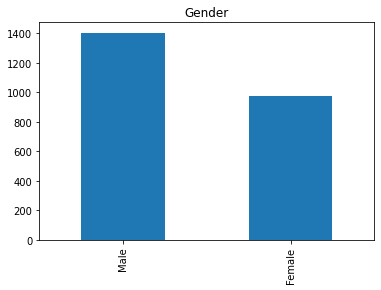

In [55]:
d.groupby('Emp_ID').last()['Gender'].value_counts().plot(kind='bar', title='Gender');

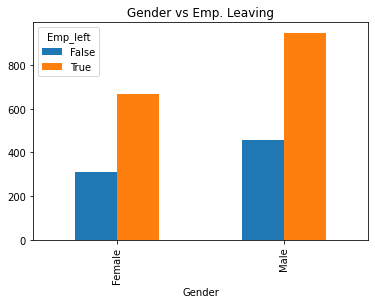

In [56]:
d['Emp_left'] = d.apply(lambda x:True if x['Emp_ID'] in emp_left.Emp_ID.tolist() else False, axis=1)
d.groupby(['Emp_ID']).last().groupby(['Gender', 'Emp_left']).size().unstack().plot(kind='bar', title='Gender vs Emp. Leaving');

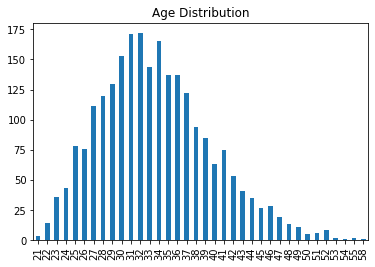

In [12]:
d.groupby(['Emp_ID']).last().Age.value_counts().sort_index().plot(kind = 'bar', title='Age Distribution');

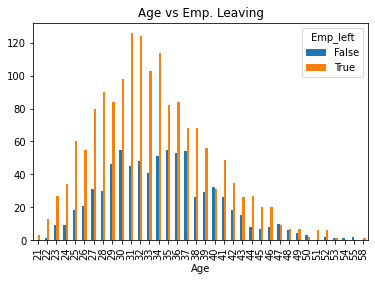

In [13]:
d.groupby(['Emp_ID']).last().groupby(['Age', 'Emp_left']).size().unstack().plot(kind='bar', title='Age vs Emp. Leaving');

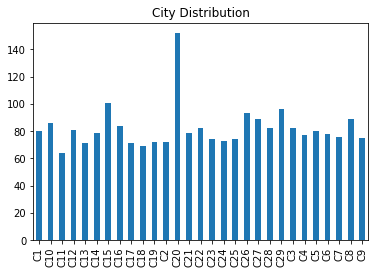

In [52]:
d.groupby(['Emp_ID']).last().City.value_counts().sort_index().plot(kind = 'bar', title='City Distribution');

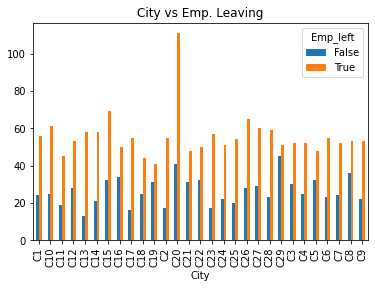

In [57]:
d.groupby(['Emp_ID']).last().groupby(['City', 'Emp_left']).size().unstack().plot(kind='bar', title='City vs Emp. Leaving');

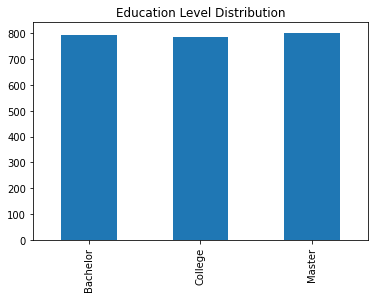

In [59]:
d.groupby(['Emp_ID']).last()['Education_Level'].value_counts().sort_index().plot(kind = 'bar', title='Education Level Distribution');

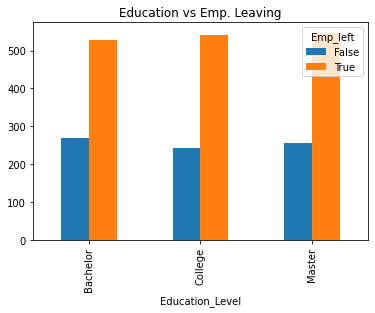

In [66]:
d.groupby(['Emp_ID']).last().groupby(['Education_Level', 'Emp_left']).size().unstack().plot(kind='bar', title='Education vs Emp. Leaving');

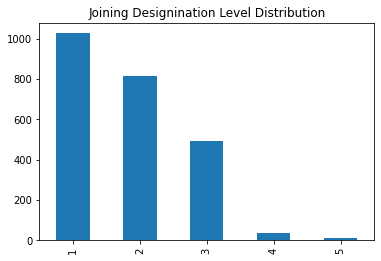

In [67]:
d.groupby(['Emp_ID']).last()['Joining Designation'].value_counts().sort_index().plot(kind = 'bar', title='Joining Designination Level Distribution');

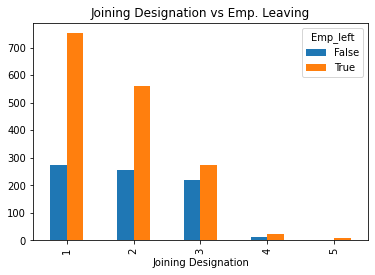

In [68]:
d.groupby(['Emp_ID']).last().groupby(['Joining Designation', 'Emp_left']).size().unstack().plot(kind='bar', title='Joining Designation vs Emp. Leaving');

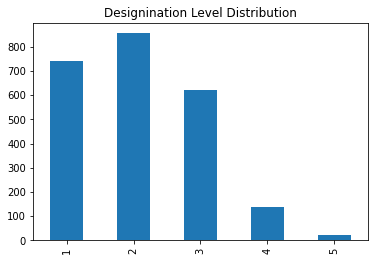

In [70]:
# Designation
d.groupby(['Emp_ID']).last()['Designation'].value_counts().sort_index().plot(kind = 'bar', title='Designination Level Distribution');

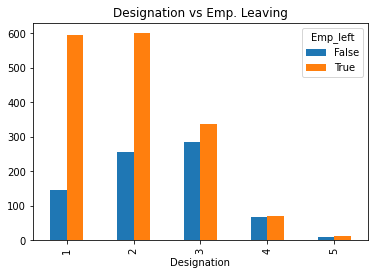

In [71]:
d.groupby(['Emp_ID']).last().groupby(['Designation', 'Emp_left']).size().unstack().plot(kind='bar', title='Designation vs Emp. Leaving');

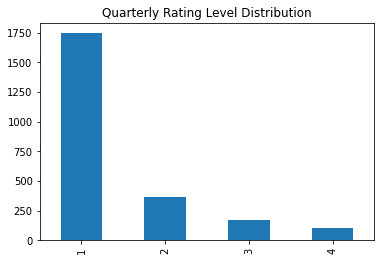

In [72]:
# Quarterly Rating
d.groupby(['Emp_ID']).last()['Quarterly Rating'].value_counts().sort_index().plot(kind = 'bar', title='Quarterly Rating Level Distribution');

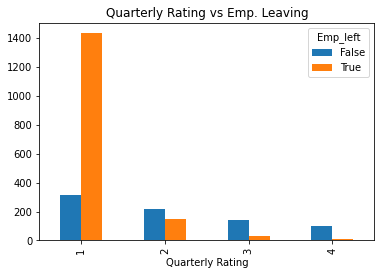

In [73]:
d.groupby(['Emp_ID']).last().groupby(['Quarterly Rating', 'Emp_left']).size().unstack().plot(kind='bar', title='Quarterly Rating vs Emp. Leaving');

In [74]:
# As suspected lower the rating more the propability to jump

## Feature generation

In [6]:
d = train_data.copy()

In [7]:
#name self explainatory
# Average salary by age
age_avg_salary = d.groupby('Emp_ID').last().groupby(['Age'])['Salary'].mean()
# Average salary by education
education_avg_salary = d.groupby('Emp_ID').last().groupby(['Education_Level'])['Salary'].mean()
city_avg_salary = d.groupby('Emp_ID').last().groupby(['City'])['Salary'].mean()
gender_avg_salary = d.groupby('Emp_ID').last().groupby(['Gender'])['Salary'].mean()

In [8]:
# converting Gender
d['Gender_c'] = d.Gender.map({'Male':1, 'Female':0})

In [11]:
# Calculate Working days of emp. at the time of monthly report
    
working = list()
for row in d.itertuples():
  if pd.isnull(row.LastWorkingDate):
    if row.Dateofjoining == 0:
      working.append(0)
    else:
      day = (row._1-row.Dateofjoining).days
      if day <1:
        working.append(1)
      else:
        working.append(day)
  else:
    working.append((row.LastWorkingDate - row.Dateofjoining).days)

d['Working_days'] = working

In [12]:
#is TBV negative on given monthly report
d['IS_TBV_Neg'] = d['Total Business Value'] < 0
#is TBV zero on given monthly report
d['IS_TBV_Zero'] = d['Total Business Value'] == 0
#Increase of TBV from previous month report
d['Inc_TBV'] = d['Total Business Value'] - d.groupby('Emp_ID')['Total Business Value'].shift()

In [13]:
#Monthly lag, choose 24 cus there is 2 year report
for i in range(1, 24):
    d[f'TBV_lag_{i}'] = d.groupby('Emp_ID')['Total Business Value'].shift(i)

# Monthly rolling sum
for i in  range(2, 24):
    d[f'TBV_rolling_{i}'] = d.groupby('Emp_ID')['Total Business Value'].rolling(i).sum().tolist()

In [14]:

# Salary increase by how much
d['Salary_inc'] = (d.Salary - d.groupby('Emp_ID').Salary.shift(1)).fillna(0)

# Salary increase recently or not
df = list()
dd = d['Salary_inc'].tolist()
for i in range(len(dd)):
    if dd[i] !=0:
        df.append(1)
    else:
        try:  
            if df[i-1] == 1:
                df.append(1)
            else:
                df.append(0)
        except:
            df.append(0)
            
d['IS_SALARY_INC'] = df

In [15]:
#salary divide by age
d = d.assign(salary_per_age = lambda x:x.Salary/x.Age)
#TBV divide by age
d = d.assign(tbv_per_age = lambda x: x['Total Business Value']/x.Age)

d['age_avg_salary'] = age_avg_salary[d.Age.unique().tolist()[-1]]
d['education_avg_salary'] = education_avg_salary[d.Education_Level.unique().tolist()[0]]
d['city_avg_salary'] = city_avg_salary[d.City.unique().tolist()[0]]

# salary divide by working days
d = d.assign(Salary_per_working_day = lambda x:np.where(x.Working_days != 0 , x.Salary/x.Working_days, 0))
# TBV divide by working days
d = d.assign(TBV_per_working_day = lambda x:np.where(x.Working_days != 0 ,x['Total Business Value']/x.Working_days, 0))
# Month of report
d = d.assign(month = lambda x: x['MMM-YY'].dt.month)

In [16]:
# get dummy the two col.
col_getd = ['City',	'Education_Level']
d = pd.get_dummies(d.loc[:, col_getd]) \
      .merge(d, left_index=True , right_index=True)

In [17]:
"', '".join(d.columns.tolist())

"City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Education_Level_Bachelor', 'Education_Level_College', 'Education_Level_Master', 'MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Designation', 'Total Business Value', 'Quarterly Rating', 'Gender_c', 'Working_days', 'IS_TBV_Neg', 'IS_TBV_Zero', 'Inc_TBV', 'TBV_lag_1', 'TBV_lag_2', 'TBV_lag_3', 'TBV_lag_4', 'TBV_lag_5', 'TBV_lag_6', 'TBV_lag_7', 'TBV_lag_8', 'TBV_lag_9', 'TBV_lag_10', 'TBV_lag_11', 'TBV_lag_12', 'TBV_lag_13', 'TBV_lag_14', 'TBV_lag_15', 'TBV_lag_16', 'TBV_lag_17', 'TBV_lag_18', 'TBV_lag_19', 'TBV_lag_20', 'TBV_lag_21', 'TBV_lag_22', 'TBV_lag_23', 'TBV_ro

In [18]:
ind_col = ['City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2',
           'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4',
           'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Education_Level_Bachelor', 'Education_Level_College', 'Education_Level_Master',
           'Age', 'Salary', 'Joining Designation', 'Designation', 'Total Business Value', 'Quarterly Rating', 'Gender_c', 'Working_days', 'IS_TBV_Neg',
           'IS_TBV_Zero', 'Inc_TBV', 'TBV_lag_1', 'TBV_lag_2', 'TBV_lag_3', 'TBV_lag_4', 'TBV_lag_5', 'TBV_lag_6', 'TBV_lag_7', 'TBV_lag_8', 'TBV_lag_9',
           'TBV_lag_10', 'TBV_lag_11', 'TBV_lag_12', 'TBV_lag_13', 'TBV_lag_14', 'TBV_lag_15', 'TBV_lag_16', 'TBV_lag_17', 'TBV_lag_18', 'TBV_lag_19',
           'TBV_lag_20', 'TBV_lag_21', 'TBV_lag_22', 'TBV_lag_23', 'TBV_rolling_2', 'TBV_rolling_3', 'TBV_rolling_4', 'TBV_rolling_5', 'TBV_rolling_6',
           'TBV_rolling_7', 'TBV_rolling_8', 'TBV_rolling_9', 'TBV_rolling_10', 'TBV_rolling_11', 'TBV_rolling_12', 'TBV_rolling_13', 'TBV_rolling_14',
           'TBV_rolling_15', 'TBV_rolling_16', 'TBV_rolling_17', 'TBV_rolling_18', 'TBV_rolling_19', 'TBV_rolling_20', 'TBV_rolling_21', 'TBV_rolling_22',
           'TBV_rolling_23', 'Salary_inc', 'IS_SALARY_INC', 'salary_per_age', 'tbv_per_age', 'age_avg_salary', 'education_avg_salary', 'city_avg_salary',
           'Salary_per_working_day', 'TBV_per_working_day', 'month']
len(ind_col)

98

In [19]:
# fit the standard Scaler 
sc = StandardScaler()
sc.fit(d.loc[:, ind_col[:]].fillna(0))


StandardScaler()

In [20]:
# all the above feature generation on the given dataset
# this is for jan, feb, march, april, may, june data
def feature_add(t):
    t['IS_TBV_Neg'] = t['Total Business Value'] < 0
    t['IS_TBV_Zero'] = t['Total Business Value'] == 0
    t['Inc_TBV'] = t['Total Business Value'] - t['Total Business Value'].shift()

    for i in range(1, 24):
        t[f'TBV_lag_{i}'] = t['Total Business Value'].shift(i)

    for i in  range(2, 24):
        t[f'TBV_rolling_{i}'] = t['Total Business Value'].rolling(i).sum().tolist()

    t['Salary_inc'] = (t.Salary - t.Salary.shift(1)).fillna(0)
    df = list()
    dd = t['Salary_inc'].tolist()
    for i in range(len(dd)):
        if dd[i] !=0:
            df.append(1)
        else:
            try:  
                if df[i-1] == 1:
                    df.append(1)
                else:
                    df.append(0)
            except:
                df.append(0)
    t['IS_SALARY_INC'] = df

    t = t.assign(salary_per_age = lambda x:x.Salary/x.Age)
    t = t.assign(tbv_per_age = lambda x: x['Total Business Value']/x.Age)
    t['age_avg_salary'] = age_avg_salary[t.Age.unique().tolist()[-1]]
    t['education_avg_salary'] = education_avg_salary[t.Education_Level.unique().tolist()[0]]
    t['city_avg_salary'] = city_avg_salary[t.City.unique().tolist()[0]]
    t = t.assign(Salary_per_working_day = lambda x:np.where(x.Working_days != 0 , x.Salary/x.Working_days, 0))
    t = t.assign(TBV_per_working_day = lambda x:np.where(x.Working_days != 0 , x['Total Business Value']/x.Working_days, 0))
    t = t.assign(month = lambda x: x['MMM-YY'].dt.month)
    t.fillna(0, inplace=True)
    return t

t = d.query('Emp_ID == 1')
t = feature_add(t)
t.loc[:,ind_col].shape

(3, 98)

## model building

In [21]:
g = d.copy()

In [22]:
emp_left = g.loc[:, ['Emp_ID', 'LastWorkingDate']] \
                .dropna().reset_index(drop=True)
print('employees exit - ', emp_left.shape[0])
emp_exit = emp_left.Emp_ID.tolist()

employees exit -  1616


In [24]:
def apply_PCA(rss_data):
    rss_data = rss_data.T
    df_rss = np.asmatrix(rss_data)
    sigma = np.cov(df_rss.T)
    
    eigVals, eigVec = np.linalg.eig(sigma)
    sorted_index = eigVals.argsort()[::-1] 
    
    eigVals = eigVals[sorted_index]
    eigVec = eigVec[:,sorted_index]
    eigVec = eigVec[:,:1]
    
    transformed_rss = df_rss.dot(eigVec)
    
    final_rss_df = np.hstack((transformed_rss))
    final_rss_df = pd.DataFrame(final_rss_df)
    
    return final_rss_df

In [25]:
g = d.copy()
emp_data = g.Emp_ID.unique()

final_df = pd.DataFrame()
for emp in tqdm(emp_data):
  #create dataframe of 24 month reporting time
    e = g[g.Emp_ID == emp]
    e = feature_add(e)

    X = sc.transform(e.loc[:, ind_col])

    try:
        X = apply_PCA(X)
    except:
        #if there is one row it will not consider in training model
        continue

    tar = 1 if emp in emp_exit else 0
    X['target'] = tar
    final_df = pd.concat([final_df, X], axis=0, ignore_index=True)


  # break

100%|██████████████████████████████████████████████████████████████████████████████| 2381/2381 [02:05<00:00, 19.05it/s]


In [26]:
final_df.shape

(2200, 99)

In [27]:
final_df = final_df.astype(float)

X = final_df.iloc[:,:-1]
y = final_df.iloc[:, -1]
y=y.astype('int')

X.columns = ind_col

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC(kernel='sigmoid'))
names.append('SVM')
# random forest
models.append(RandomForestClassifier(n_estimators=100))
names.append('RF1')
models.append(RandomForestClassifier(random_state=0, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 24))
names.append('RF2')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
#xgb
models.append(XGBClassifier(
    booster= 'gbtree',colsample_bytree= 0.6, learning_rate= 0.05, max_features=93,
    max_depth= 10, min_child_weight= 1, subsample= 1,eta=0.01,
    n_estimators= 250,random_state=1,min_data_in_leaf=2
))
names.append('XGB')
#lbg
models.append(LGBMClassifier(colsample_bytree= 0.66, learning_rate= 0.045, max_depth= 10, max_features=93 , 
                         min_impurity_decrease= 0, min_impurity_split= 1e-07, min_samples_leaf= 1, min_data_in_leaf=2,verbose=-1,
                         min_samples_split= 95, n_estimators= 150, num_leaves= 15, reg_alpha= 1, reg_lambda= 1, 
                         subsample= 0.4,random_state=1,metric='f1_macros',max_iter=4))
names.append('lgb')


all_scores = list()
for i in range(len(models)):
    s = StandardScaler()
    p = Pipeline(steps=[('s',s), ('m',models[i])])
    scores = cross_val_score(p, X, y, scoring='f1_macro', cv=5, n_jobs=-1)
    all_scores.append(scores)
    m, s = np.mean(scores)*100, np.std(scores)*100
    print('%s %.3f%% +/-%.3f' % (names[i], m, s))



LR 61.001% +/-1.611
KNN 70.490% +/-1.609
CART 86.785% +/-1.288
SVM 57.840% +/-3.402
RF1 88.789% +/-0.530
RF2 89.033% +/-0.889
GBM 90.782% +/-0.734
XGB 91.430% +/-1.111
lgb 91.384% +/-1.154


NameError: name 'pyplot' is not defined

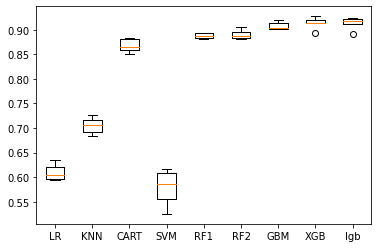

In [35]:
plt.boxplot(all_scores, labels=names)
plt.show()

In [37]:

class WeightedAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):

    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
        assert sum(self.weights)==1
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict_proba(X)[:,1] for model in self.models_
        ])
        # print(predictions)
        y_pred = np.sum(predictions*self.weights, axis=1) 
        return np.where(y_pred > 0.49, 1, 0)

In [39]:
f_model = WeightedAveragedModels([models[5], models[6], models[7], models[8]], [ 0.27,0.18, 0.30, 0.25])
f_model.fit(x_train, y_train)

y_pred = f_model.predict(x_test)
f1_score(y_test,y_pred, average='macro')

[23:26:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_data_in_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9005321651361573

In [42]:
test_id = test_data.Emp_ID.tolist()

In [43]:
g = d.copy()
# january
print('jan')

f_check_jan = pd.DataFrame()
for emp in tqdm(test_id):

    e = g[g.Emp_ID == emp]

    con = e.iloc[-1, :]
    con['Total Business Value'] = e['Total Business Value'].rolling(4).mean().iloc[-1]
    con['Working_days'] = con['Working_days'] + 31
    con['month'] = 1
    e = pd.concat([e,con.to_frame().T], axis=0)
    g = pd.concat([g, con.to_frame().T], axis=0)

    e = feature_add(e)

    X = sc.transform(e.loc[:, ind_col])

    try:
        X = apply_PCA(X)
    except:
        print(emp)
        continue
    f_check_jan = pd.concat([f_check_jan, X], axis=0, ignore_index=True)
  # break
  
print(f_check_jan.shape)
f_check_jan = f_check_jan.astype(float)
f_check_jan.columns = ind_col
test_preds = f_model.predict(f_check_jan)

print(pd.Series(test_preds.reshape(-1,)).value_counts())

#check
test_id_dic = dict()
for i, result in enumerate(test_preds):
    test_id_dic[test_id[i]] = result

remaining_test = [i for i, j in test_id_dic.items() if j != 1 ]
print('remaining length - ', len(remaining_test))


#feb
print('\n feb')
f_check_feb = pd.DataFrame()
for emp in tqdm(remaining_test):

    #create dataframe of 24 month reporting time
    e = g[g.Emp_ID == emp]

    con = e.iloc[-1, :]
    con['Total Business Value'] = e['Total Business Value'].rolling(4).mean().iloc[-1]
    con['Working_days'] = con['Working_days'] + 28
    con['month'] = 2

    e = pd.concat([e,con.to_frame().T], axis=0)
    g = pd.concat([g, con.to_frame().T], axis=0)

    e = feature_add(e)

    X = sc.transform(e.loc[:, ind_col])

    try:
        X = apply_PCA(X)
    except:
        continue
    f_check_feb = pd.concat([f_check_feb, X], axis=0, ignore_index=True)
  # break
print(f_check_feb.shape)
f_check_feb = f_check_feb.astype(float)
f_check_feb.columns = ind_col
test_preds = f_model.predict(f_check_feb)

print(pd.Series(test_preds.reshape(-1,)).value_counts())

for i, result in enumerate(test_preds):
    test_id_dic[remaining_test[i]] = result

remaining_test = [i for i, j in test_id_dic.items() if j != 1 ]
print('remaining length - ', len(remaining_test))



# march
print('\n mar')
f_check_mar = pd.DataFrame()
for emp in tqdm(remaining_test):

    #create dataframe of 24 month reporting time
    e = g[g.Emp_ID == emp]

    con = e.iloc[-1, :]
    con['Total Business Value'] = e['Total Business Value'].rolling(4).mean().iloc[-1]
    con['Working_days'] = con['Working_days'] + 31
    con['month'] = 3
    e = pd.concat([e,con.to_frame().T], axis=0)
    g = pd.concat([g, con.to_frame().T], axis=0)

    e = feature_add(e)

    X = sc.transform(e.loc[:, ind_col])

    try:
        X = apply_PCA(X)
    except:
        continue
    f_check_mar = pd.concat([f_check_mar, X], axis=0, ignore_index=True)
    # break
print(f_check_mar.shape)
f_check_mar = f_check_mar.astype(float)
f_check_mar.columns = ind_col
test_preds = f_model.predict(f_check_mar)

print(pd.Series(test_preds.reshape(-1,)).value_counts())

#check
for i, result in enumerate(test_preds):
    test_id_dic[remaining_test[i]] = result

remaining_test = [i for i, j in test_id_dic.items() if j != 1 ]
print('remaining length - ', len(remaining_test))



#April
print('\n april')
f_check_april = pd.DataFrame()
for emp in tqdm(remaining_test):

    #create dataframe of 24 month reporting time
    e = g[g.Emp_ID == emp]

    con = e.iloc[-1, :]
    con['Total Business Value'] = e['Total Business Value'].rolling(4).mean().iloc[-1]
    con['Working_days'] = con['Working_days'] + 30
    con['month'] = 4
    e = pd.concat([e,con.to_frame().T], axis=0)
    g = pd.concat([g, con.to_frame().T], axis=0)

    e = feature_add(e)

    X = sc.transform(e.loc[:, ind_col])

    try:
        X = apply_PCA(X)
    except:
        continue
    f_check_april = pd.concat([f_check_april, X], axis=0, ignore_index=True)
  # break
print(f_check_april.shape)
f_check_april = f_check_april.astype(float)

f_check_april.columns = ind_col
test_preds = f_model.predict(f_check_april)

print(pd.Series(test_preds.reshape(-1,)).value_counts())

#check
for i, result in enumerate(test_preds):
    test_id_dic[remaining_test[i]] = result

remaining_test = [i for i, j in test_id_dic.items() if j != 1 ]
print('remaining length - ', len(remaining_test))


# MAY
print('\n may')
f_check_may = pd.DataFrame()
for emp in tqdm(remaining_test):

    #create dataframe of 24 month reporting time
    e = g[g.Emp_ID == emp]

    con = e.iloc[-1, :]
    con['Total Business Value'] = e['Total Business Value'].rolling(4).mean().iloc[-1]
    con['Working_days'] = con['Working_days'] + 31
    con['month'] = 5
    e = pd.concat([e,con.to_frame().T], axis=0)
    g = pd.concat([g, con.to_frame().T], axis=0)

    e = feature_add(e)

    X = sc.transform(e.loc[:, ind_col])

    try:
        X = apply_PCA(X)
    except:
        continue
    f_check_may = pd.concat([f_check_may, X], axis=0, ignore_index=True)
  # break
print(f_check_may.shape)
f_check_may = f_check_may.astype(float)

f_check_may.columns = ind_col
test_preds = f_model.predict(f_check_may)

print(pd.Series(test_preds.reshape(-1,)).value_counts())

#check
for i, result in enumerate(test_preds):
    test_id_dic[remaining_test[i]] = result

remaining_test = [i for i, j in test_id_dic.items() if j != 1 ]
print('remaining length - ', len(remaining_test))


# JUNE
print('\n June')
f_check_june = pd.DataFrame()
for emp in tqdm(remaining_test):

    #create dataframe of 24 month reporting time
    e = g[g.Emp_ID == emp]

    con = e.iloc[-1, :]
    con['Total Business Value'] = e['Total Business Value'].rolling(4).mean().iloc[-1]
    con['Working_days'] = con['Working_days'] + 30
    con['month'] = 6
    e = pd.concat([e,con.to_frame().T], axis=0)
    g = pd.concat([g, con.to_frame().T], axis=0)

    e = feature_add(e)

    X = sc.transform(e.loc[:, ind_col])

    try:
        X = apply_PCA(X)
    except:
        continue
    f_check_june = pd.concat([f_check_june, X], axis=0, ignore_index=True)
  # break
print(f_check_june.shape)
f_check_june = f_check_june.astype(float)

f_check_june.columns = ind_col
test_preds = f_model.predict(f_check_june)

print(pd.Series(test_preds.reshape(-1,)).value_counts())

#check
for i, result in enumerate(test_preds):
    test_id_dic[remaining_test[i]] = result

remaining_test = [i for i, j in test_id_dic.items() if j != 1 ]
print('remaining length - ', len(remaining_test))


  0%|                                                                                  | 1/741 [00:00<01:25,  8.62it/s]

jan


100%|████████████████████████████████████████████████████████████████████████████████| 741/741 [02:48<00:00,  4.39it/s]
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
  0%|                                                                                          | 0/650 [00:00<?, ?it/s]

(741, 98)
0    650
1     91
dtype: int64
remaining length -  650

 feb


100%|████████████████████████████████████████████████████████████████████████████████| 650/650 [02:18<00:00,  4.68it/s]
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


(650, 98)


  0%|                                                                                          | 0/589 [00:00<?, ?it/s]

0    589
1     61
dtype: int64
remaining length -  589

 mar


100%|████████████████████████████████████████████████████████████████████████████████| 589/589 [02:08<00:00,  4.58it/s]
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
  0%|                                                                                          | 0/572 [00:00<?, ?it/s]

(589, 98)
0    572
1     17
dtype: int64
remaining length -  572

 april


100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [01:45<00:00,  5.43it/s]
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
  0%|                                                                                          | 0/563 [00:00<?, ?it/s]

(572, 98)
0    563
1      9
dtype: int64
remaining length -  563

 may


100%|████████████████████████████████████████████████████████████████████████████████| 563/563 [01:56<00:00,  4.82it/s]
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
  0%|                                                                                          | 0/552 [00:00<?, ?it/s]

(563, 98)
0    552
1     11
dtype: int64
remaining length -  552

 June


100%|████████████████████████████████████████████████████████████████████████████████| 552/552 [02:14<00:00,  4.11it/s]


NameError: name 'f_check' is not defined

0    544
1      8
dtype: int64
remaining length -  544


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [45]:
sub = pd.DataFrame.from_dict(test_id_dic, orient='index').reset_index()
sub.columns = ['Emp_ID','Target']
sub.to_csv('tryf2.csv', index=False)